In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
!pip install xgboost

In [3]:
from xgboost import XGBRegressor

In [4]:
from sklearn import metrics

In [5]:
df = pd.read_csv('email.csv')

In [6]:
print("### Preview of Dataset:")
print(df.head(), "\n")

### Preview of Dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro... 



In [7]:
print("### Shape of Dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

### Shape of Dataset:
Rows: 5573, Columns: 2



In [8]:
print("### Data Types and Non-Null Counts:")
print(df.info(), "\n")

### Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None 



In [9]:
print("### Null Values in Each Column:")
print(df.isnull().sum(), "\n")

### Null Values in Each Column:
Category    0
Message     0
dtype: int64 



In [10]:
print("### Column Names:")
print(df.columns.tolist())

### Column Names:
['Category', 'Message']


In [11]:
print("### Statistical Summary of Numeric Columns:")
df.describe()

### Statistical Summary of Numeric Columns:


,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df['Message_Length'] = df['Message'].apply(len)

In [13]:
sns.set(style="whitegrid")

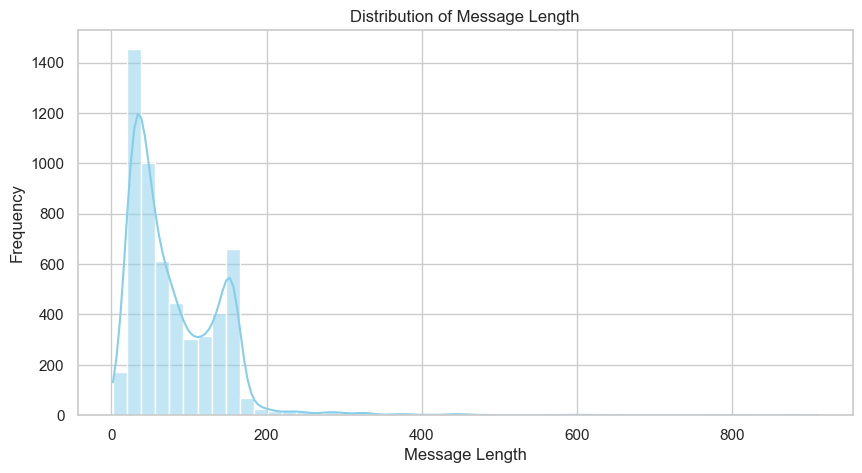

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Message_Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

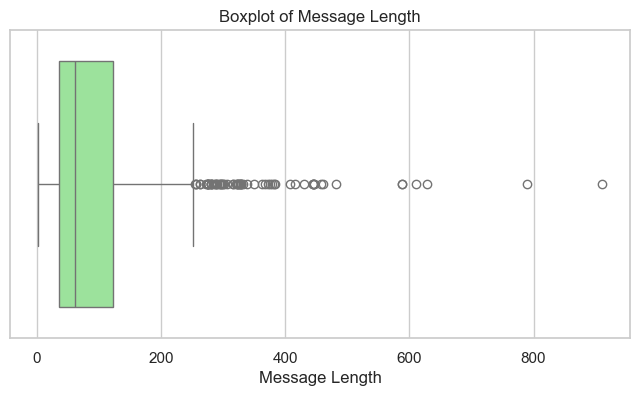

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Message_Length'], color='lightgreen')
plt.title('Boxplot of Message Length')
plt.xlabel('Message Length')
plt.show()


In [16]:
df['Category_Encoded'] = df['Category'].map({'ham': 0, 'spam': 1})

In [17]:
corr_matrix = df[['Message_Length', 'Category_Encoded']].corr()

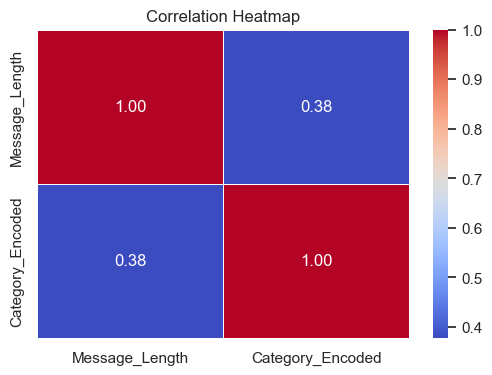

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
def select_correlated_features(df, target_col, threshold=0.1):
    """
    Select features that have a correlation higher than the given threshold with the target variable.

    Parameters:
    - df: Pandas DataFrame
    - target_col: name of the target column (must be numeric)
    - threshold: minimum absolute correlation to keep a feature

    Returns:
    - A new DataFrame with selected features and the target column
    """
    
    numeric_df = df.select_dtypes(include='number')

  
    correlations = numeric_df.corr()[target_col].drop(target_col)

    selected_features = correlations[correlations.abs() >= threshold].index.tolist()


    selected_features.append(target_col)

   
    return df[selected_features]

In [20]:
df['Category_Encoded'] = df['Category'].map({'ham': 0, 'spam': 1})
new_df = select_correlated_features(df, target_col='Category_Encoded', threshold=0.1)
print("Selected Features Based on Correlation:\n", new_df.head())                 

Selected Features Based on Correlation:
    Message_Length  Category_Encoded
0             111               0.0
1              29               0.0
2             155               1.0
3              49               0.0
4              61               0.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [22]:
df.dropna(inplace=True) 
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Message'], df['Category'], test_size=0.2, random_state=42)

In [24]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [25]:
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM (SGDClassifier)": SGDClassifier(loss='hinge', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

In [26]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"\n📊 Evaluation for: {name}")
    print("-" * 40)
    print(f"Accuracy : {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall   : {recall_score(y_test, preds):.4f}")
    print(f"F1-Score : {f1_score(y_test, preds):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, preds))


In [27]:
for name, model in models.items():
    evaluate_model(name, model, X_train_tfidf, y_train, X_test_tfidf, y_test)


📊 Evaluation for: Multinomial Naive Bayes
----------------------------------------
Accuracy : 0.9767
Precision: 1.0000
Recall   : 0.8255
F1-Score : 0.9044

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115


📊 Evaluation for: Logistic Regression
----------------------------------------
Accuracy : 0.9677
Precision: 1.0000
Recall   : 0.7584
F1-Score : 0.8626

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97

In [28]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [30]:
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

In [31]:
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

In [32]:
print("✅ Model and vectorizer saved successfully.")

✅ Model and vectorizer saved successfully.


In [34]:
import re

def preprocess_text(text):
    return re.sub(r'[^\w\s]', '', text.lower())

# Load model and vectorizer
import pickle

with open('naive_bayes_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    loaded_vectorizer = pickle.load(vec_file)

# Clean and predict
sample_text = ["Congratulations! You've won a free ticket to Bahamas. Call now!"]
cleaned_text = [preprocess_text(text) for text in sample_text]
sample_vector = loaded_vectorizer.transform(cleaned_text)
prediction = loaded_model.predict(sample_vector)

print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")



Prediction: Spam
